In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Setting graph visual
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 8
sns.set_style('darkgrid')

In [3]:
#Importing data set
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#General information about the data set
diabetes_df.info()

#The diabetes data set has a total of 768 rows and 9 columns. No value is missing and no value is null.
# All values are intergers or floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#General summary about the data set
diabetes_df.describe()

#0 values seem to be missing values since BloodPressure, Glucose, SkinThickness, Insuline, and BMI levels cannot be 0.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_df[(diabetes_df['Glucose'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
diabetes_df[(diabetes_df['Pregnancies'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
16,0,118,84,47,230,45.8,0.551,31,1
45,0,180,66,39,0,42.0,1.893,25,1
57,0,100,88,60,110,46.8,0.962,31,0
58,0,146,82,0,0,40.5,1.781,44,0
...,...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21,0
727,0,141,84,26,0,32.4,0.433,22,0
736,0,126,86,27,120,27.4,0.515,21,0
753,0,181,88,44,510,43.3,0.222,26,1


In [8]:
#Need to replace the 0 from columns Glucose, BloodPressure, SkinThickness, Insuline, and BMI with NaN values to not affect
# model calculations.

#Using .copy(deep = True) to make a TRUE COPY of the data set without making a reference to the data set
# After which, use .replace(x, y) to replace all x values with specified y values

diabetes_df_2 = diabetes_df.copy(deep = True)

for column in diabetes_df:
    if column == 'Glucose' or column == 'BloodPressure' or column == 'SkinThickness' or column == 'Insulin' or column == 'BMI':
        diabetes_df_2[column] = diabetes_df_2[column].replace(0, np.NaN)
        
diabetes_df_2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Checking the df again with info
diabetes_df_2.info()

#We can see that the NaN or null values have been added to the previously mentioned columns. Now the data set has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


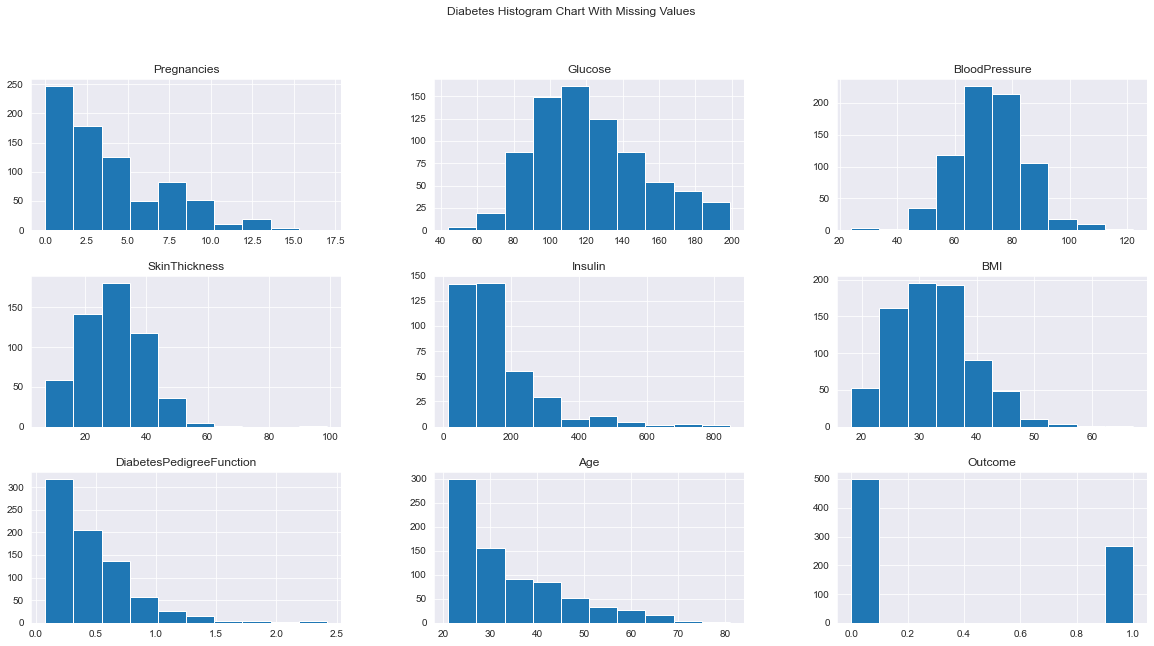

In [10]:
#Checking the historgram plots of all columns within the data set
diabetes_df_2.hist(figsize = (20, 10))
plt.suptitle('Diabetes Histogram Chart With Missing Values')
plt.show()

#From the graphs, we can observe that most patients are not pregnant or have 1 kid.
# The glucose levels are mostly distributed in the range 80 - 150
# Blodd pressure is mostly around 50 to 90
# Skin thickness around 20 to 40
# Insuline around 0 to 200
# BMI 25 to 40
# Age 20 to 30
# Diabetes Predigree function 0 to 0.5
# And most people do not have diabetes

In [11]:
#It seems like Skin thickness, Insuline, and BMI graphs are skewed => We will replace the missing values with median instead of mean
# For Glucose and Blood Pressure, it is okay to use mean for imputing.
# To do both, we will use .fillna function

for column in diabetes_df_2:
    if column == 'SkinThickness' or column == 'Insulin' or column == 'BMI':
        diabetes_df_2[column].fillna(diabetes_df_2[column].median(), inplace = True)

for column in diabetes_df_2:
    if column == 'Glucose' or column == 'BloodPressure':
        diabetes_df_2[column].fillna(diabetes_df_2[column].mean(), inplace = True)
        
diabetes_df_2.info()
#Now all the null values have been replaced by either mean or median.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


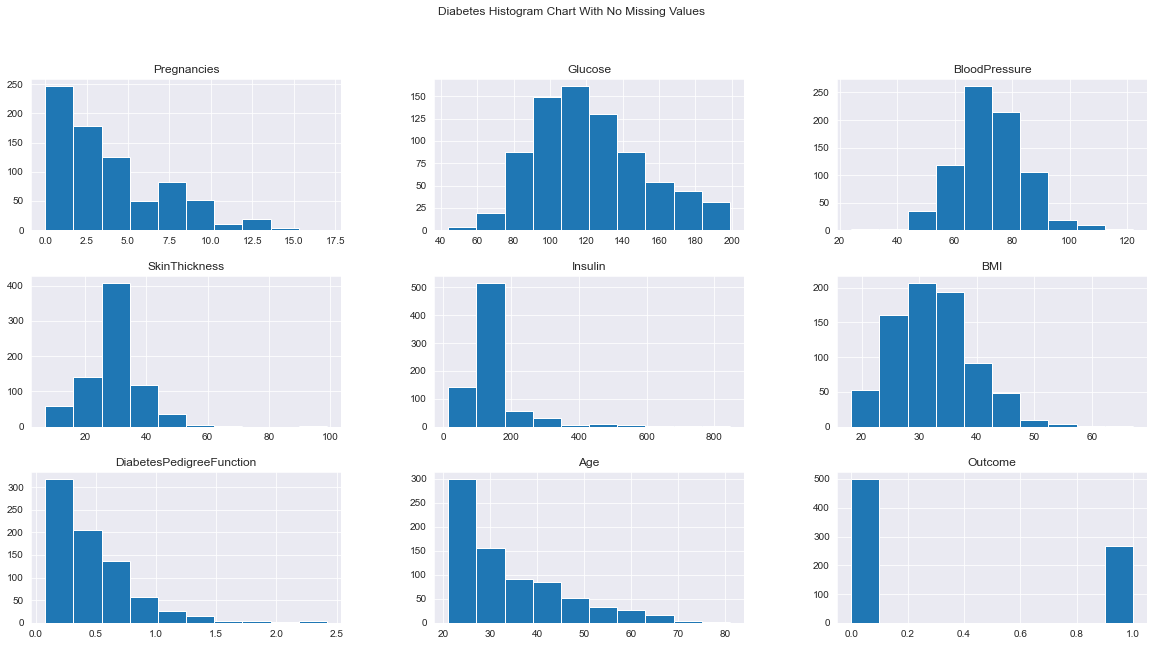

In [12]:
#Check the histogram graphs again
diabetes_df_2.hist(figsize = (20, 10))
plt.suptitle('Diabetes Histogram Chart With No Missing Values')
plt.show()

#While the histogram distributions have changed, the distributed range that we mentioned earlier still remains the same

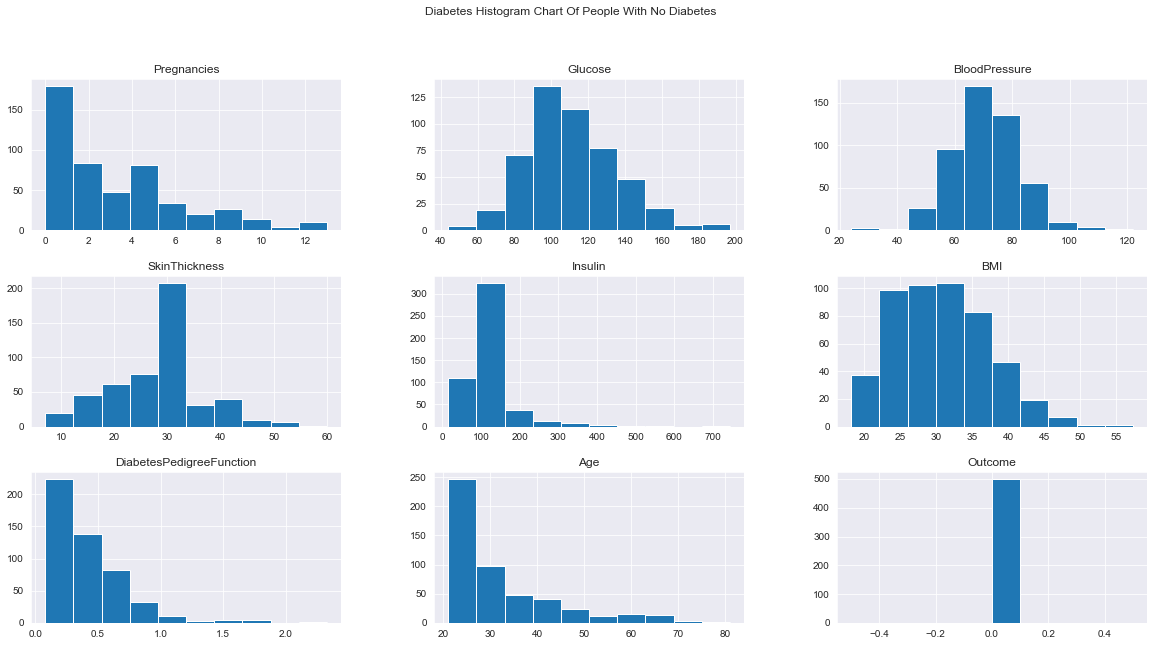

In [13]:
#View the hist graph in terms of people with no diabetes
diabetes_df_2[(diabetes_df_2['Outcome'] == 0)].hist(figsize = (20, 10))
plt.suptitle('Diabetes Histogram Chart Of People With No Diabetes')
plt.show()

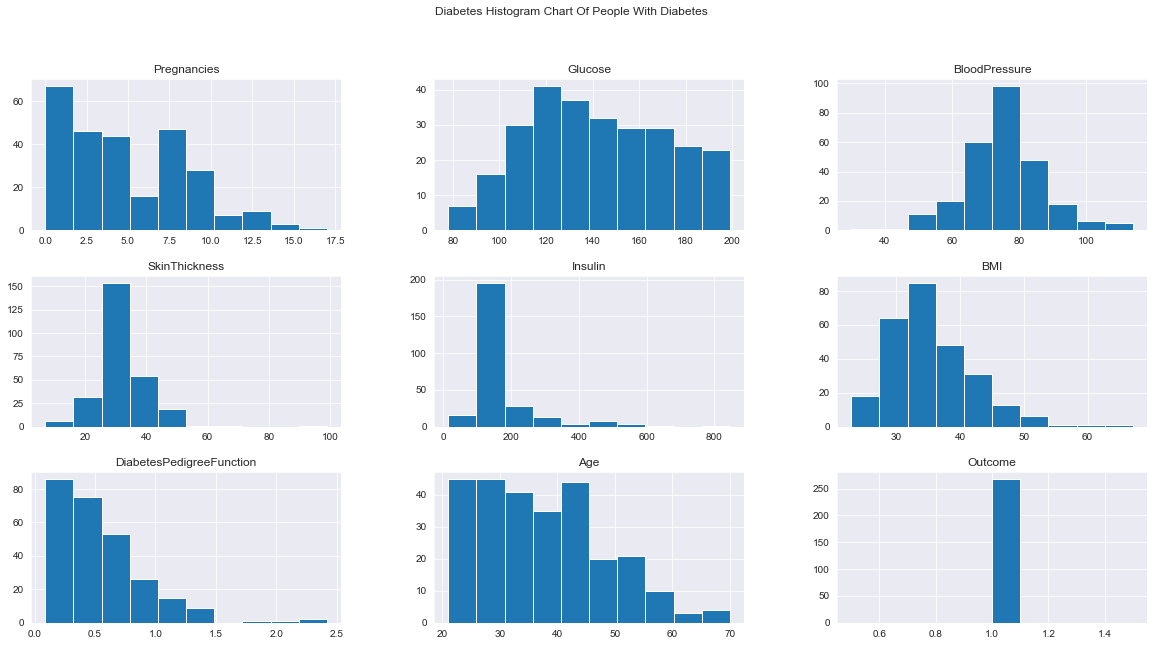

In [14]:
#View the hist graph in terms of people with diabetes
diabetes_df_2[(diabetes_df_2['Outcome'] == 1)].hist(figsize = (20, 10))
plt.suptitle('Diabetes Histogram Chart Of People With Diabetes')
plt.show()

In [15]:
#From both hist graphs, seems like people with diabetes are overall older than people with no diabetes.
# People with diabetes also have higher glucose levels 
# People with diabetes also have slightly higher BMI levels but not by much
#=> Seems like glucose levels and age are the two biggest factors

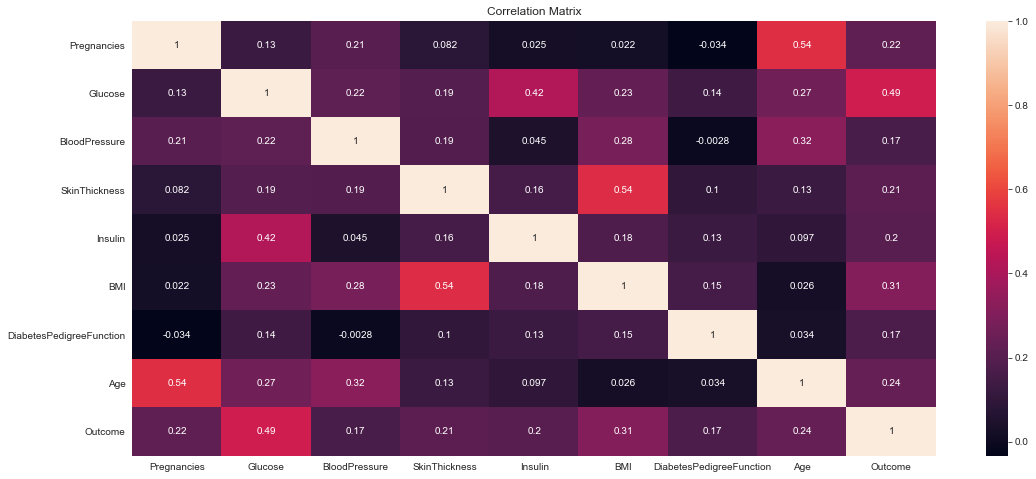

In [16]:
#Checking for correlation between data with heat map
sns.heatmap(diabetes_df_2.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

#The highest level of correlation is 0.54 so there don't seem to be much correlation

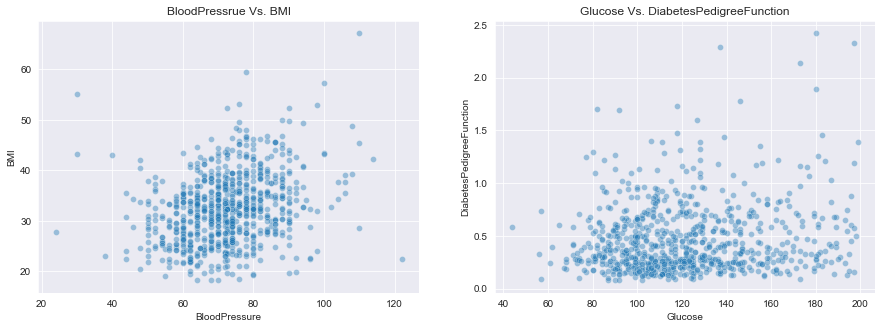

In [17]:
#Using scatter plot to explore the data set with Blood Pressure Vs. BMI and Glucose Vs. Diabetes Pedeigree Function
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.scatterplot(x = 'BloodPressure', y = 'BMI', data = diabetes_df_2, alpha = 0.4, ax = axes[0]) #Alpha value adjust transparancy
                                                                                    #Higher Alpha values will overlap darker
axes[0].set_title('BloodPressrue Vs. BMI')

sns.scatterplot(x = 'Glucose', y = 'DiabetesPedigreeFunction', data = diabetes_df_2, alpha = 0.4, ax = axes[1])
axes[1].set_title('Glucose Vs. DiabetesPedigreeFunction')

plt.show()

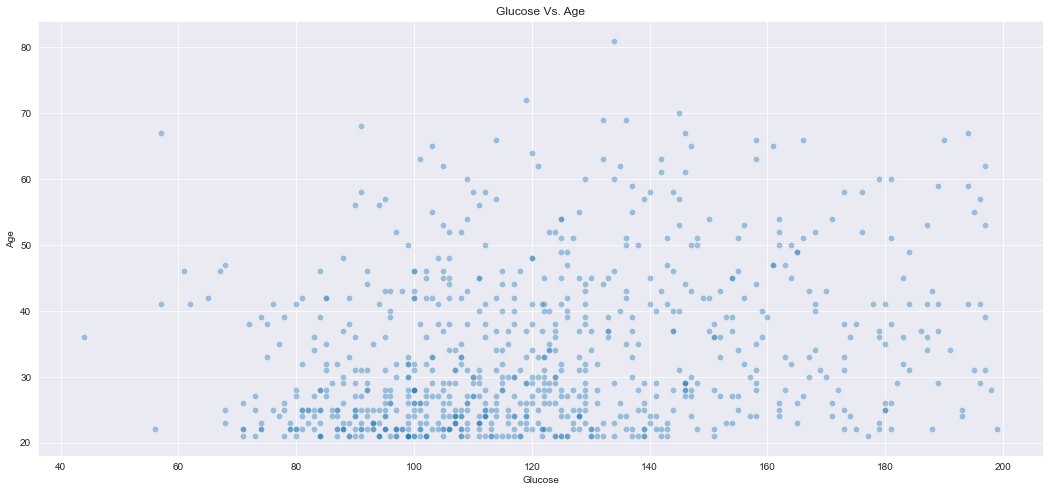

In [18]:
#Using the same graph, we can compare between glucose level and age
sns.scatterplot(x = 'Glucose', y = 'Age', data = diabetes_df_2, alpha = 0.4) 
plt.title('Glucose Vs. Age')
plt.show()

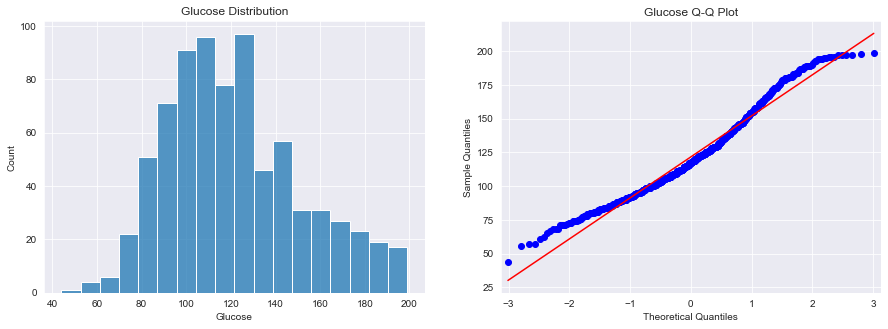

Shapiro Wilk: 
w:0.969902515411377, p value:1.7774986343921384e-11

Kolmogorov Smirnov: 
d:0.969902515411377, p-value:0.0

Skewness of the data: 
0.531677628850459



In [19]:
#Using Q-Q plot
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(diabetes_df_2['Glucose'], ax=axes[0])
axes[0].set_title('Glucose Distribution')
sm.qqplot(diabetes_df_2['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')
pylab.show()
w, p_val = scipy.stats.shapiro(diabetes_df_2['Glucose'])
print('Shapiro Wilk: \nw:{}, p value:{}\n'.format(w,p_val))
d, p_val = scipy.stats.kstest(diabetes_df_2['Glucose'], 'norm')
print('Kolmogorov Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))
print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_2['Glucose'])))

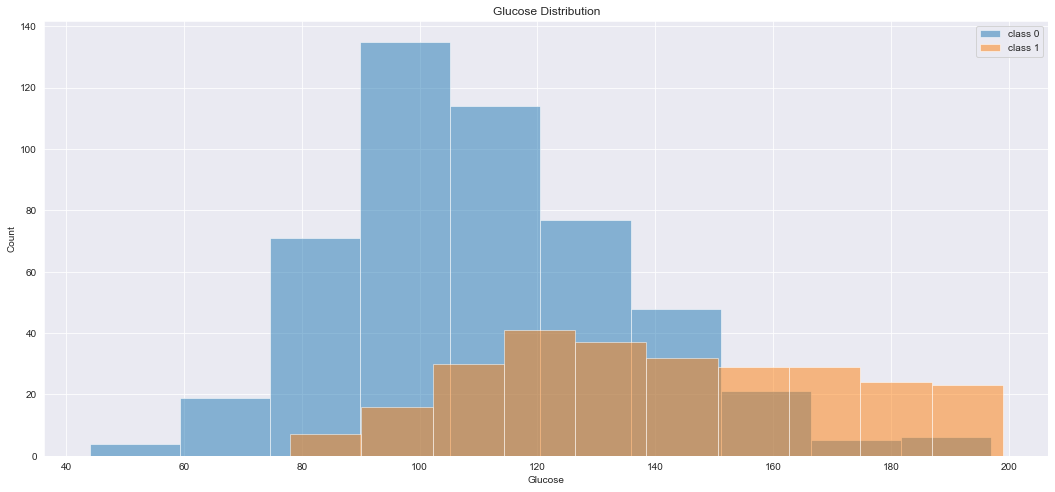

In [20]:
#Deeper comparision between Glucose levels of people with diabetes and people without diabetes
class_zero = diabetes_df_2[(diabetes_df_2['Outcome'] == 0)]
class_one = diabetes_df_2[(diabetes_df_2['Outcome'] == 1)]
plt.hist(x=class_zero['Glucose'], label='class 0', alpha=0.5)
plt.hist(x=class_one['Glucose'], label='class 1', alpha=0.5)
plt.legend()
plt.title('Glucose Distribution')
plt.ylabel('Count')
plt.xlabel('Glucose')
plt.show()

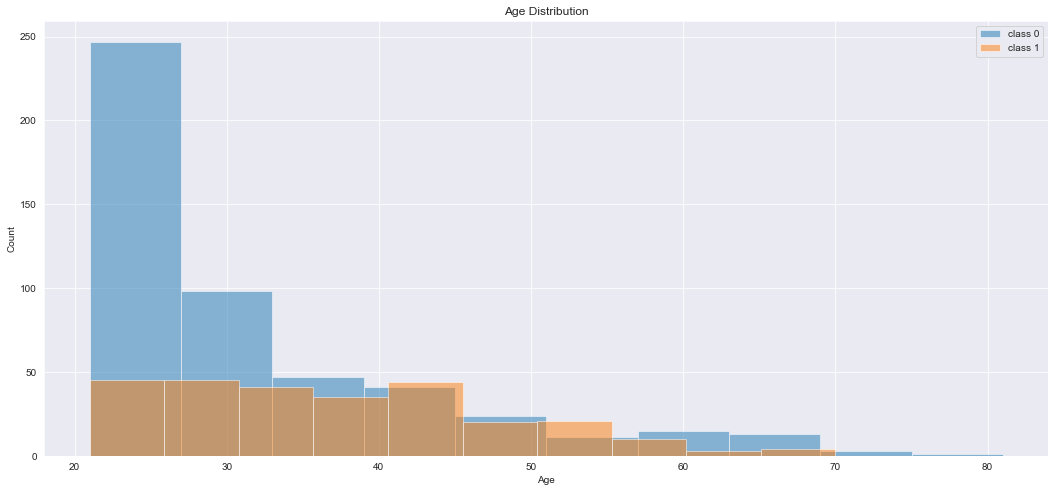

In [21]:
#Deeper comparision between Age levels of people with diabetes and people without diabetes
class_zero = diabetes_df_2[(diabetes_df_2['Outcome'] == 0)]
class_one = diabetes_df_2[(diabetes_df_2['Outcome'] == 1)]
plt.hist(x=class_zero['Age'], label='class 0', alpha=0.5)
plt.hist(x=class_one['Age'], label='class 1', alpha=0.5)
plt.legend()
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

#Seems like our hypothesis preivously about age being a high impact values toward people with diabes is false based on the
# following graph

In [22]:
################################################## PRE-PROCESSING ############################################################

In [23]:
#It is very important to standaridize our data because KNN classifier predicts the class of a given test observation by 
# identifying the ovservations that are nearest ot it => The scale of the variable matters

from sklearn.preprocessing import StandardScaler
X= diabetes_df_2.drop('Outcome', axis = 1) #All columns other than Outcome
y = diabetes_df_2['Outcome']

#Scaler object
scaler = StandardScaler()

#Use scalar object to transform our data
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [24]:
#Transform it to a df
X = pd.DataFrame(data = X_scaled, columns = X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [25]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,-3.301757e-16,6.966722e-16,-1.795800e-16,4.416317e-17,2.815312e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.541850e+00,4.102655e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [26]:
####################################### CREATING A KNN MODEL ################################################################

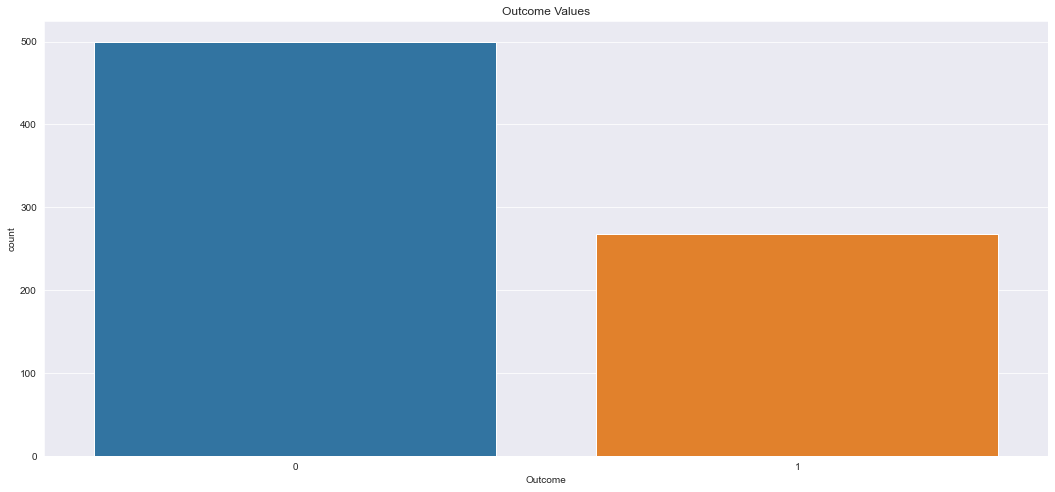

In [27]:
sns.countplot(x = diabetes_df_2['Outcome'])
plt.title('Outcome Values')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

#Because the number of non diabetic people is almost double the people who have diabetes, we can add in the parameters stratify.
# Stratify aims at splitting a data set so that each split is similar with respect to something.
# In a classification settings, it is often chosen to ensure that the train and test sets have approximately the same percentage
# of samples of each target class as the complete set.

#Here we use stratify with people without diabetes and people with diabetes to get a balance distribution between both cases
# in our train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y, random_state = 129)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

#Since k values have big impact on our KNN model, we will try out with some k values 
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

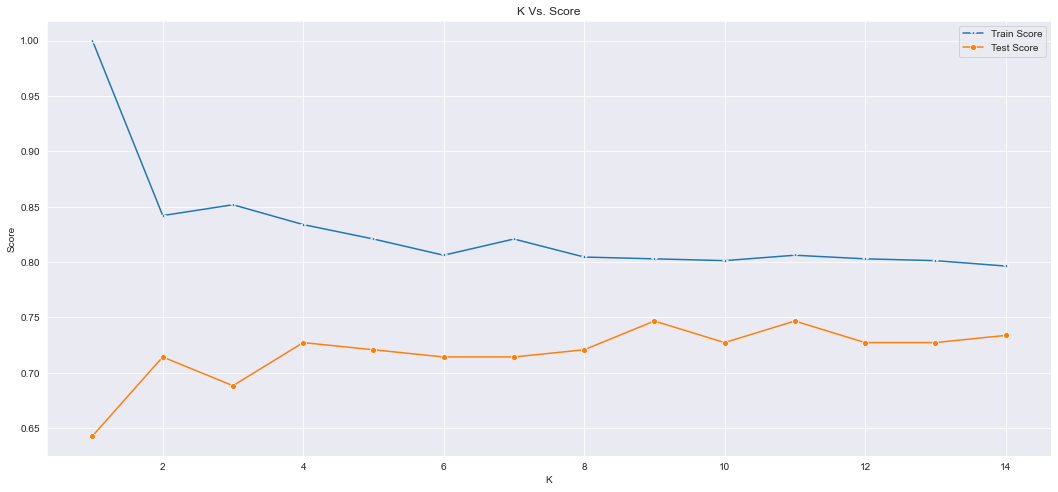

In [30]:
#Plot the result between different k values
sns.lineplot(x = range(1, 15), y = train_scores, marker = '*', label = 'Train Score')
sns.lineplot(x = range(1, 15), y = test_scores, marker = 'o', label = 'Test Score')
plt.title('K Vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

#Based on the result k = 11 seems to be the best result with the test score

In [31]:
#Thus we will use k = 11 for now
knn = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7467532467532467

In [32]:
#Now we convert the result to a confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154

[[84 16]
 [23 31]]


In [33]:
################################################## IMPROVING THE KNN MODEL ####################################################

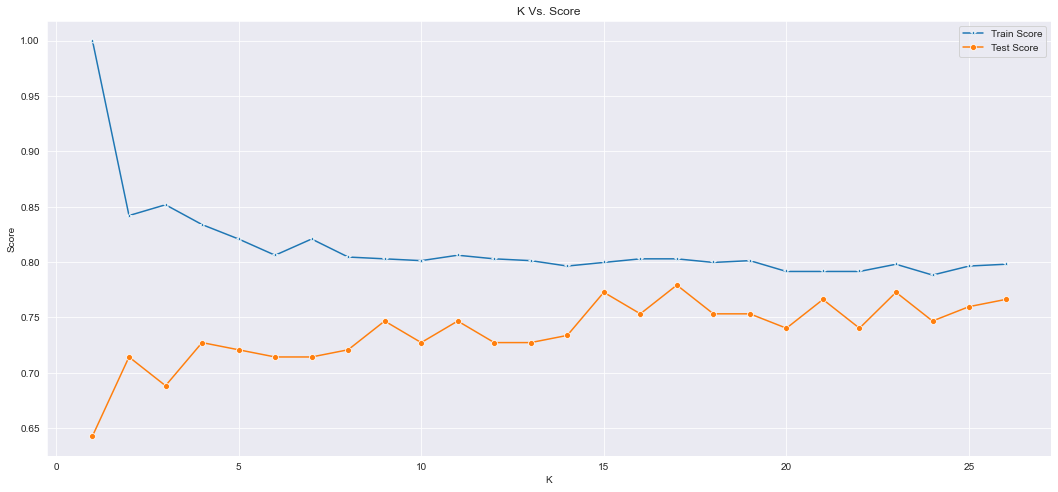

In [34]:
#Since there are 768 values => sqrt(768) = ~27 We can try k from 1 -> 27 and see how it affect our result
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

#Since k values have big impact on our KNN model, we will try out with some k values 
for i in range(1, 27):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
#Plot the result between different k values
sns.lineplot(x = range(1, 27), y = train_scores, marker = '*', label = 'Train Score')
sns.lineplot(x = range(1, 27), y = test_scores, marker = 'o', label = 'Test Score')
plt.title('K Vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [35]:
print(max(test_scores))
print(test_scores.index(max(test_scores)))
#Seems like k = 16 is the best k for our model

0.7792207792207793
16


In [36]:
#Thus we will use k = 16
knn = KNeighborsClassifier(16)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#Now we convert the result to a confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#Seems like the increase in accuracy with k = 16 compared to 11 is minimal

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.72      0.48      0.58        54

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154

[[90 10]
 [28 26]]
